# Graphs

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import h5py
import EWdata

### Random nucleation -- energy

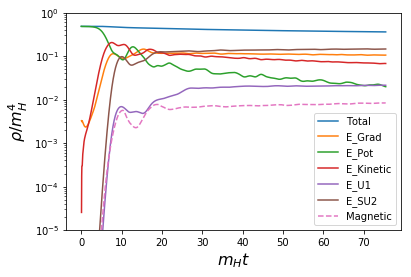

In [43]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
#file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_1123_dtable.txt')
file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_1153_dtable.txt')
df = pd.read_csv(file_path)
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)


plt.plot(df.index*c1.dt()*c1.mH(), df['TotalEnergy']/(c1.LatV() * c1.mH()**4), label = 'Total')
plt.plot(df.index*c1.dt()*c1.mH(), df['E_Grad']/(c1.LatV() * c1.mH()**4), label = 'E_Grad')
plt.plot(df.index*c1.dt()*c1.mH(), df['E_Pot']/(c1.LatV() * c1.mH()**4), label = 'E_Pot')
plt.plot(df.index*c1.dt()*c1.mH(), df['E_Kinetic']/(c1.LatV() * c1.mH()**4), label = 'E_Kinetic')
plt.plot(df.index*c1.dt()*c1.mH(), df['E_U1']/(c1.LatV() * c1.mH()**4), label = 'E_U1')
plt.plot(df.index*c1.dt()*c1.mH(), df['E_SU2']/(c1.LatV() * c1.mH()**4), label = 'E_SU2')
plt.plot(df.index*c1.dt()*c1.mH(), df['MagneticEnergy']/(c1.LatV() * c1.mH()**4), label = 'Magnetic', linestyle = '--')
plt.legend()
plt.xlabel('$m_H t$', fontsize = 16)
plt.ylabel('$\\rho/m_H^4$', fontsize = 16)
plt.yscale('log')
plt.ylim([10**-5, 1])
plt.show()

### Random nucleation -- Total bubbles

In [27]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
colors = ['r','g','b','orange','cyan','purple']

ids = [
    '1121', '1122', '1123', '1124', '1125',
    '1113', '1114', 
    '1133', '1134', 
    '1143', '1144',
    '1153', '1154']
p_b = []
damping = []
total_bubbles = []
plt_c = []


for i in ids:
    file_path_dtable = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_dtable.txt')
    file_path_param = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_param.txt')
    df = pd.read_csv(file_path_dtable)
    pa = EWdata.ParamReader(file_path_param)
    p_b.append(float(pa['NucleationProbability']))
    damping.append(float(pa['HiggsDamping']))
    total_bubbles.append( df['NewBubbleCount'].sum() )

ld = list(np.unique(damping))
for d in damping:
    plt_c.append(colors[ld.index(d)])

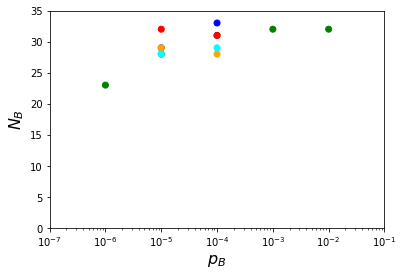

In [30]:
plt.scatter(p_b, total_bubbles, c = plt_c)
plt.xlabel('$p_B$', fontsize = 16)
plt.ylabel('$N_B$', fontsize = 16)
plt.xscale('log')
plt.xlim([10**-7,10**-1])
plt.ylim([0, 35])
plt.show()

### Random nucleation -- magnetic energy

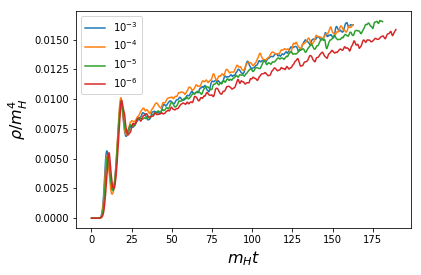

In [12]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
ids = ['1122', '1123', '1124', '1125']
log10_pb = [-3, -4, -5, -6]

for idx, i in enumerate(ids):
    file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_dtable.txt')
    df = pd.read_csv(file_path)
    plt.plot(df.index*c1.dt()*c1.mH(), 
             df['MagneticEnergy']/(c1.LatV() * c1.mH()**4), 
             label = '$10^{'+str(log10_pb[idx])+'}$')
plt.legend()
plt.xlabel('$m_H t$', fontsize = 16)
plt.ylabel('$\\rho/m_H^4$', fontsize = 16)
plt.show()

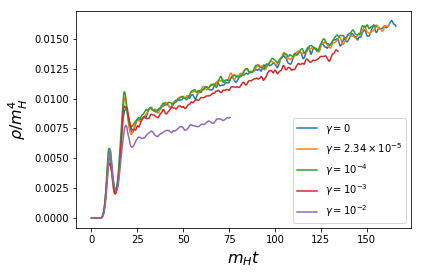

In [35]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
ids = ['1113', '1123', '1133', '1143','1153']
damping = ['0', '$2.34 \\times 10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$']

plt.figure()
for idx, i in enumerate(ids):
    file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_dtable.txt')
    df = pd.read_csv(file_path)
    plt.plot(df.index*c1.dt()*c1.mH(), 
             df['MagneticEnergy']/(c1.LatV() * c1.mH()**4), 
             label = '$\gamma=$'+damping[idx])
plt.legend()
plt.xlabel('$m_H t$', fontsize = 16)
plt.ylabel('$\\rho/m_H^4$', fontsize = 16)
plt.show()

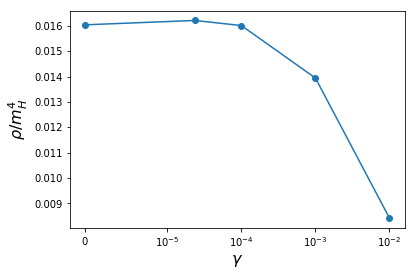

In [34]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
ids = ['1113', '1123', '1133', '1143','1153']
damping = [0, 2.34*10**-5, 10**-4, 10**-3, 10**-2]
mag = []

for idx, i in enumerate(ids):
    file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_dtable.txt')
    df = pd.read_csv(file_path)
    mag.append( (df['MagneticEnergy']/(c1.LatV() * c1.mH()**4)).iloc[-1] )

plt.plot(damping, mag, marker = 'o')
plt.xscale('symlog', linthreshx = 10**-5)
plt.xlabel('$\gamma$', fontsize = 16)
plt.ylabel('$\\rho/m_H^4$', fontsize = 16)
plt.show()


### One bubble

In [17]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'

file_path = os.path.join(root_path, 'one_bubble', 'raw_1', 'one.1_den_140.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 128)

print(h5file.attrs_)

{'col_name_0': b'TotalEnergy', 'col_name_1': b'MagneticEnergy', 'col_name_2': b'HiggsMagnitude2'}


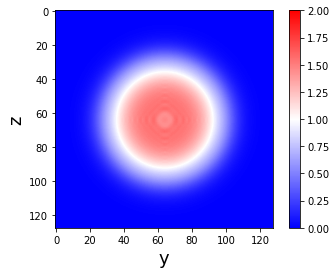

In [18]:
# Higgs magnitude squared
data_ = dset[:,:,dshape[2]/2,2] / c1.eta()**2 ### in units of eta2
plt.imshow(data_, interpolation = 'bilinear', 
           vmin = 0, vmax = 2,
           cmap = 'bwr')
plt.colorbar()
plt.xlabel('y', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.show()

### Example of random nucleation

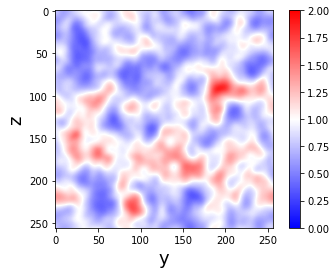

In [27]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'

file_path = os.path.join(root_path, 'rand_nucl_256', 'raw_short', 'rnu_1123_den_2000.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)

# Higgs magnitude squared
data_ = dset[:,:,dshape[2]/2,2] / c1.eta()**2 ### in units of eta2
plt.imshow(data_, interpolation = 'bilinear', 
           vmin = 0, vmax = 2,
           cmap = 'bwr')
plt.colorbar()
plt.xlabel('y', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.show()

### Two Bubbles

In [23]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'

file_path = os.path.join(root_path, 'two_bubbles', 'raw_1', 'two.1_den_1.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)

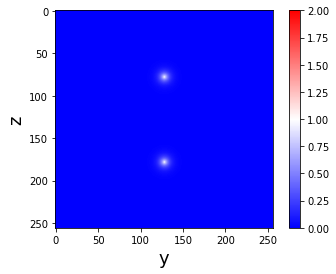

In [24]:
# Higgs magnitude squared
data_ = dset[:,:,dshape[2]/2,2] / c1.eta()**2 ### in units of eta2
plt.imshow(data_, interpolation = 'bilinear', 
           vmin = 0, vmax = 2,
           cmap = 'bwr')
plt.colorbar()
plt.xlabel('y', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.show()

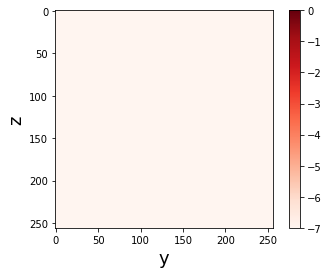

In [25]:
# magnetic energy density
data_ = np.log10(1e-13 + dset[:,:,dshape[2]/2,1] / c1.mH()**4) ### norm to units mH^4
plt.imshow(data_, interpolation = 'bilinear', 
           cmap = 'Reds', vmin = -7, vmax = 0)
plt.colorbar()
plt.xlabel('y', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.show()

### Non-random bubbles